# COVID-19 Data Analysis

## Background

Coronavirus Disease 2019, abbreviated as COVID-19, is an illness that commonly affects the upper respiratory tract, but it is known to cause complications in many other areas of the body as well. The severity of these complications has the potential to cause permanent tissue damage, or even death. It is highly contagious, with over 7 million cases reported worldwide over the last 6 months. Given the novelty of the disease, it is important to keep track of the trends made apparent by relevant data in order to gain a better understanding of it.

## Data Source

Data regarding the geographic distribution of COVID-19 cases worldwide was obtained from the [European Centre for Disease Prevention and Control.](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [51]:
import pandas

%matplotlib inline

In [52]:
df = pandas.read_excel('s3://isat252-yem/COVID-19-geographic-disbtribution-worldwide.xlsx')
df[:5]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-10,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia


## Total Number of Cases (Top 10 Countries)

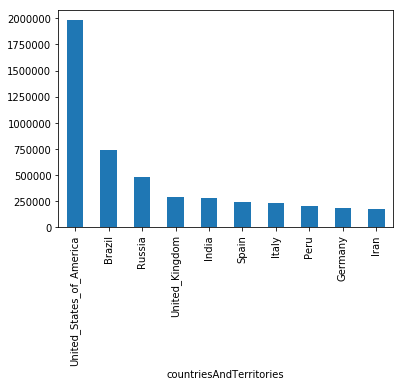

In [53]:
TotCasePerCountry = df.groupby('countriesAndTerritories').sum()['cases']

TotCasePerCountry.nlargest(10).plot.bar()

### Calculation

First, I grouped each data entry by its country attribute found in the 'countriesAndTerritories' column, then had the program calculate the sum of cases that were recorded within each group, and set the entire command equal to the variable, 'TotCasePerCountry'. After, I asked the program to display a bar graph only depicting the data of countries with the top 10 highest total number of cases.

### Interpretation

The majority of the top 10 countries have an approximate total of 250,000 cases or less. However, Russia, Brazil, and the United States all have noticeably higher case incidences, with the U.S. in particular skyrocketing above every other country at roughly 2,000,000 cases.

## Cases in the Top 3 Countries

In [54]:
usa = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']

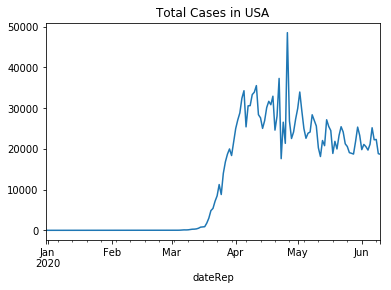

In [55]:
CasesUSA = usa.groupby('dateRep').sum()['cases']

CasesUSA.plot(x = 'dateRep', y = 'cases', title = 'Total Cases in USA')

In [56]:
brazil = df.loc[df['countriesAndTerritories'] == 'Brazil']

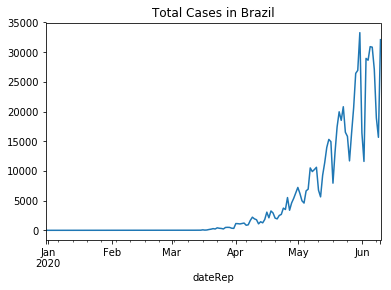

In [57]:
CasesBrazil = brazil.groupby('dateRep').sum()['cases']

CasesBrazil.plot(x = 'dateRep', y = 'cases', title = 'Total Cases in Brazil')

In [58]:
russia = df.loc[df['countriesAndTerritories'] == 'Russia']

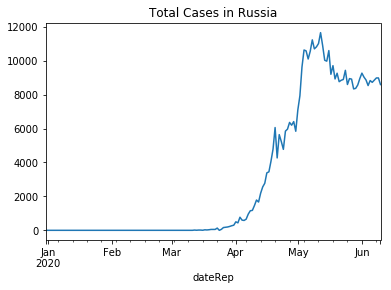

In [59]:
CasesRussia = russia.groupby('dateRep').sum()['cases']

CasesRussia.plot(x = 'dateRep', y = 'cases', title = 'Total Cases in Russia')

### Calculation

For the first graph, the .loc method was used to select data that was only associated with the 'United_States_of_America' attribute. After the selection was assigned to a variable named 'usa', I grouped the data entries by date, and asked the program to only calculate the number of cases per day, and display this calculation in the form of a line graph.

The same steps were used to output the total number of cases over time for both Brazil and Russia, changing their variable names, respectively.

### Interpretation

Both USA and Russia appear to be on a downward trend with regard to case incidence. Brazil, however, currently seems to either be plateauing or experiencing an upward trend with constant, drastic, weekly spikes compared to the other 2 countries.

## Deaths in the Top 3 Countries

In [60]:
usa1 = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']

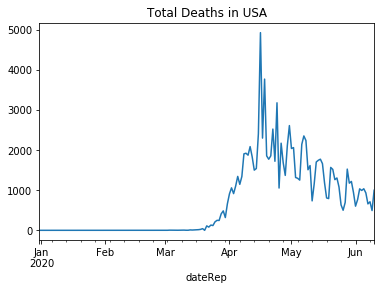

In [61]:
DeathsUSA = usa1.groupby('dateRep').sum()['deaths']

DeathsUSA.plot(x = 'dateRep', y = 'deaths', title = 'Total Deaths in USA')

In [62]:
brazil1 = df.loc[df['countriesAndTerritories'] == 'Brazil']

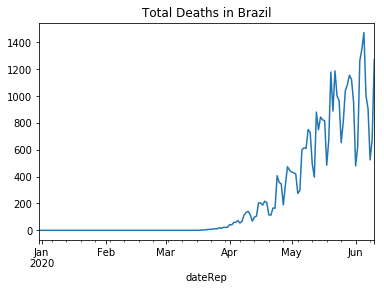

In [63]:
DeathsBrazil = brazil1.groupby('dateRep').sum()['deaths']

DeathsBrazil.plot(x = 'dateRep', y = 'deaths', title = 'Total Deaths in Brazil')

In [64]:
russia1 = df.loc[df['countriesAndTerritories'] == 'Russia']

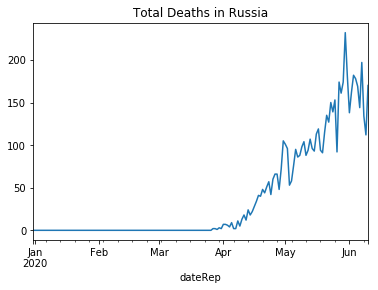

In [65]:
DeathsRussia = russia1.groupby('dateRep').sum()['deaths']

DeathsRussia.plot(x = 'dateRep', y = 'deaths', title = 'Total Deaths in Russia')

### Calculation

For the first graph, I used the .loc method to run a query and select only data associated with the 'United_States_of_America' attribute in the 'countriesAndTerritories' field. I then gave the selection a variable name of 'usa1'. After, I grouped the 'usa1' data by the 'dateRep' field and had the program calculate the number of deaths reported on each date, which was then depicted on a line graph utilizing the variable 'DeathsUSA'.

Similar steps were repeated to output the same data for both Brazil and Russia.

### Interpretation

In the USA, deaths from COVID-19 seemed to have already peaked during mid-April, but the other 2 countries still appear to be on an upward trend in this regard.

When comparing the cases graphs with the deaths graphs of their respective countries, you can see the overall, direct correlation between the 2 variables.

## Conclusion

It is apparent from the data that these countries, and more broadly, the world, is nowhere near finished seeing the significant impacts of COVID-19, even though some downward trends can be observed. The continuous rise and fall of new cases and deaths resulting from said cases is indicative of how unstable both the nature of the virus is as well as our ability to collectively mitigate its effects. 

One of the limitations in my project was the inability to establish a clear figure of recoveries that have taken place. Having this data would further illustrate the progress made by various countries.

To improve this project, I would ideally construct comparative graphs that also take the population of each country into account so the data isn't possibly skewed by countries with exceptionally large or small populations. 